In [8]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('Mall_Customers.csv')

In [12]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler


In [24]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
print("Datos Normalizados:")
print(X_scaled[:5])

Datos Normalizados:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


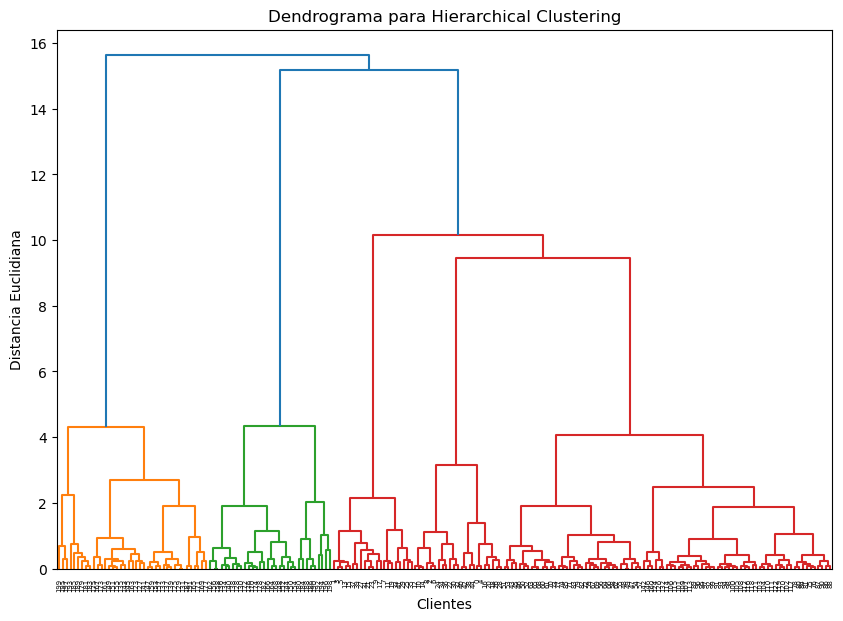

In [30]:
linked = linkage(X_scaled, method='ward')  

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=False)
plt.title('Dendrograma para Hierarchical Clustering')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
hierarchical_clustering = AgglomerativeClustering(
    n_clusters=5,  
    metric='euclidean',  
    linkage='ward' 
)

In [38]:
clusters = hierarchical_clustering.fit_predict(X_scaled)

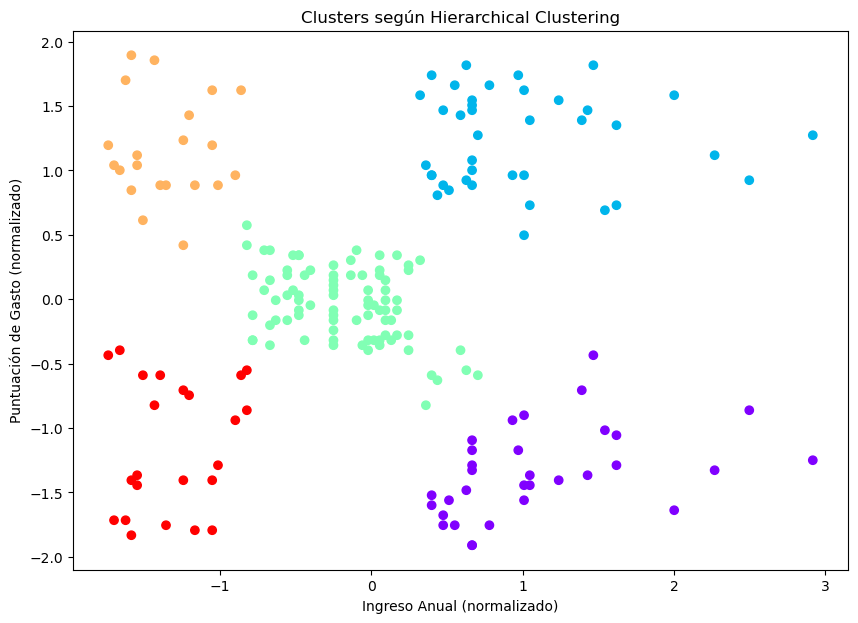

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='rainbow')
plt.title('Clusters según Hierarchical Clustering')
plt.xlabel('Ingreso Anual (normalizado)')
plt.ylabel('Puntuación de Gasto (normalizado)')
plt.show()

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

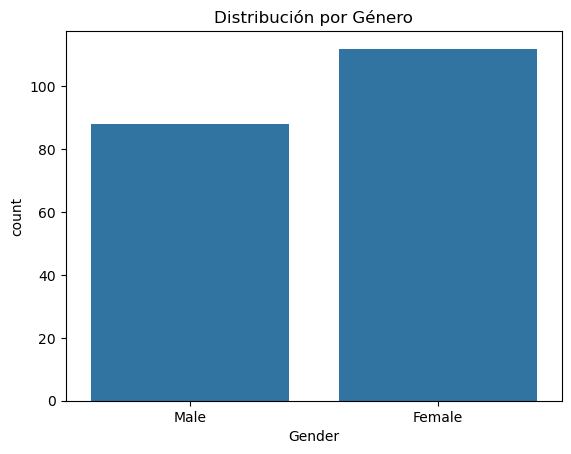

In [47]:
sns.countplot(data, x='Gender')
plt.title('Distribución por Género')
plt.show()

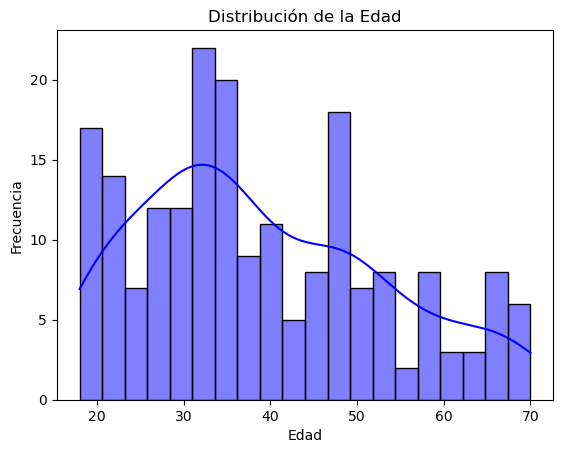

In [49]:
sns.histplot(data['Age'], kde=True, bins=20, color='blue')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

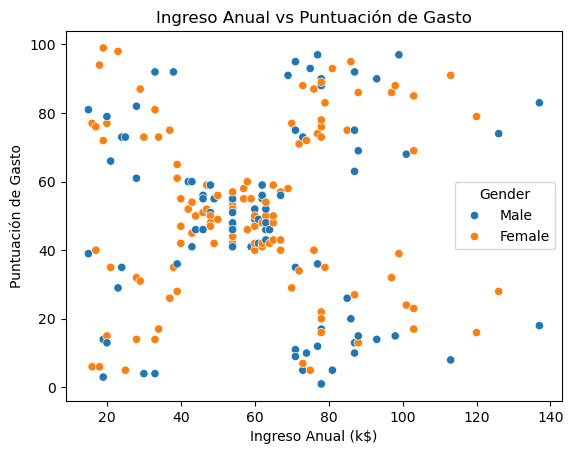

In [51]:
sns.scatterplot(data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Ingreso Anual vs Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto')
plt.show()

In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [57]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [59]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [61]:
silhouette = silhouette_score(X_scaled, clusters)
print(f"Coeficiente de Silhouette: {silhouette}")

Coeficiente de Silhouette: 0.5538089226688662


In [63]:
calinski = calinski_harabasz_score(X_scaled, clusters)
print(f"Índice de Calinski-Harabasz: {calinski}")

Índice de Calinski-Harabasz: 244.41032586596822
